In [446]:
import numpy as np 
import pandas as pd
import itertools
import scipy.stats
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Denote:

* Asset types: $\Phi = \lbrace 1, 2, ..., T \rbrace $
    * Enumeration: $\phi$
* Assets: $\mathcal{A}$
    * Subset of assets of asset type $\phi \in \Phi$: $\mathcal{A}_\phi$
    * $A_\Phi = (\mathcal{A}_1, \mathcal{A}_2, ..., \mathcal{A}_T)$
* Number of assets: $N$
    * Number of assets of asset type $\phi \in \Phi$: $N_\phi$
    * $N_\Phi = (N_1, N_2, ... N_T)$
* Designs: $\mathcal{D} = \lbrace (i_1, i_2, ..., i_T) : i_1 \in A_1, i_2 \in A_2, ... i_T \in A_t \rbrace $
    * Single design: $d \in \mathcal{D}$
    * Dummy vector: $\mathcal{v}_{d} = [
        \mathbb{I}_{\lbrace i_1 = 1 \rbrace},
        \mathbb{I}_{\lbrace i_1 = 2 \rbrace},
        ...
        \mathbb{I}_{\lbrace i_1 = N_1 \rbrace},
        \mathbb{I}_{\lbrace i_2 = 1 \rbrace},
        ...
        \mathbb{I}_{\lbrace i_T = 1 \rbrace},
        ...
        \mathbb{I}_{\lbrace i_T = N_T \rbrace}
      ]^T$
    * Enumeration: $j$
* User: $u$
* Asset influence vector: $\beta \in \mathbb{R}^{1 \times \sum \Phi_i}$ 
    * Max influence for a design: $\gamma$


\begin{align}
    P_{d,u}(\text{click}) &\sim B(f(d, u)) \\
    f(d, u) &= \mathbb{P}(\text{click} | u) + \beta \mathcal{v}_{d}
\end{align}

In [458]:
Φ = [1, 2, 3]
N_Φ = [10, 7, 7]
A_Φ = (list(range(1, N_ϕ + 1)) for N_ϕ in N_Φ)
D = list(itertools.product(*A_Φ))
γ = 0.25
β = np.random.uniform(-γ / len(Φ), γ / len(Φ), sum(N_Φ))

In [459]:
def dummy_design_vector(d):
    v_d = []
    for i_ϕ, N_ϕ in zip(d, N_Φ):
        values = list(np.zeros(N_ϕ))
        values[i_ϕ - 1] = 1
        v_d += values
    return np.array(v_d).astype(int)

In [460]:
# The set of all dummy design vectors
v_D = [dummy_design_vector(d) for d in D]

In [461]:
P_click_u = [0.25 for _ in range(1000)]
data = []
for u, p in enumerate(P_click_u):
    j = random.randint(0, len(D) - 1)
    data.append({
        'user': u,
        'design': D[j],
        'click': scipy.stats.bernoulli.rvs(p + np.dot(v_D[j], β))
    })

In [464]:
# pd.DataFrame(data).groupby('design')['click'].mean().sort_values().plot.barh()

In [465]:
np.random.normal(size=4)

array([ 0.20398874,  1.81096936, -1.75474756,  1.14592289])

In [466]:
W_0 = np.random.normal(size=1)[0]
W_1 = np.random.normal(size=sum(N_Φ))
W_2 = np.random.normal(size=(sum(N_Φ), sum(N_Φ)))

In [467]:
def design_weight(design):
    v_d = dummy_design_vector(D[0])
    return (
        W_0 
        + np.dot(v_d, W_1) 
        + np.sum(np.triu(np.outer(v_d, v_d), 1) * W_2)
    )

In [468]:
W_0 = np.random.normal(size=1)[0]
W_1 = np.random.normal(size=sum(N_Φ))
W_2 = np.random.normal(size=(sum(N_Φ), sum(N_Φ)))

α_1 = 1
α_2 = 1

design_values = []
for design in D:
    v_d = dummy_design_vector(design)
    design_values.append(
        W_0 
        + (α_1 * np.dot(v_d, W_1))
        + (α_2 * np.sum(np.triu(np.outer(v_d, v_d), 1) * W_2))
    )

β = max(design_values)
design_values = np.multiply(1/β, design_values)

<AxesSubplot:ylabel='Count'>

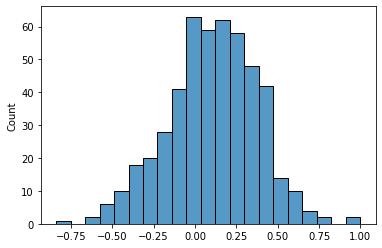

In [469]:
sns.histplot(design_values)

In [441]:
p_values = [
    scipy.stats.norm.cdf(value) for value in design_values
]

In [442]:
p_values

[0.4416711219311171,
 0.8413447460685429,
 0.6364614197439631,
 0.547522831405162,
 0.8123523006462912,
 0.7519751032271813,
 0.45002230047204017,
 0.6966453807885797,
 0.5461680421053626,
 0.502235914857857,
 0.6050518112661596,
 0.6227679164512364,
 0.2737483201818336,
 0.6259352597352317,
 0.5115941133425665,
 0.5915419126727756,
 0.7807103655047583,
 0.8232075327359514]

TODO: Scale these to [0.1, 0.3]

In [267]:
v_d = dummy_design_vector(D[0])

In [269]:
np.dot(v_d, W_1)

1.3488449381528418

In [271]:
v_d

array([1, 0, 0, 1, 0, 1, 0, 0])

In [270]:
np.dot(v_d, W_2)

array([-0.84475085,  0.29801562, -1.63040691, -0.68604103, -1.08168743,
       -2.20299781,  0.37119437, -1.10718082])

In [282]:
np.sum(np.triu(np.outer(v_d, v_d), 1) * W_2)

0.05449222888012528